## Employee Data Analysis and Classification Using Machine Learning Models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df= pd.DataFrame(pd.read_csv("employee_data.csv"))

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
Unnamed: 0         30000 non-null int64
team_member_id     30000 non-null int64
department         22421 non-null object
years_employeed    30000 non-null int64
employee_level     20039 non-null object
team_leader        30000 non-null int64
access_level       21450 non-null object
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


In [108]:
df.shape

(30000, 7)

Checking null values in our dataset

In [109]:
df.isnull().any()

Unnamed: 0         False
team_member_id     False
department          True
years_employeed    False
employee_level      True
team_leader        False
access_level        True
dtype: bool

## Preprocessing and Cleaning

<b>Checking Unique values for each columns</b>

In [110]:
# Checking unique values
print('Unique Department \n',df.department.unique(),len(df.department.unique()))
print('Unique Years employeed \n',df.years_employeed.unique(),len(df.years_employeed.unique()))
print('Unique Employee Level \n',df.employee_level.unique(),len(df.employee_level.unique()))
print('Unique Access Level \n',df.access_level.unique(),len(df.access_level.unique()))

Unique Department 
 ['Data Science' 'IT' nan 'Customer Support' 'Human Resources'
 'Operation Research' 'Product Management'] 7
Unique Years employeed 
 [  3   1   4   9   6   2   5   7 999  -1   0   8] 12
Unique Employee Level 
 ['senior' 'junior' 'specialist' nan 'associate'] 5
Unique Access Level 
 [nan 'level_5' 'level_3' 'level_1' 'level_4' 'level_2'] 6


Based on the above analysis we can observe that we have NaN values , negative values and outlier. Thus for better implementation of our model and analysis we are removing data value containing them.

<b>Dropping Negative values and outlier values</b>

Negative Values: As years can not be in negative , thus removing data records with negative year value.

Outlier : As year 999 is insignificant thus removing this value.

<b >Dropping NaN Values for each column.</b>

1. Department : Each employee has to have a department assigned . Thus values with department value as NaN are irrelevant for the analysis. Thus Dropping such rows

2. Employee level: Each employee is assigned with some designation in the company. Thus Values with Employee Level value as Nan are irrelevant for the analysis.Thus dropping such rows.

3. Access_Level: Each employee should be assigned some level of access in the company. Thus Values with Access Level as NaN are irrelevant for the analysis. Thus dropping such rows

In [111]:
# Drop duplicate columns
df=df.drop(['Unnamed: 0'],axis =1)

In [112]:
df =df.dropna()

In [113]:
df = df[df.years_employeed != 999]
df = df[df.years_employeed != -1]

In [114]:
df

,team_member_id,department,years_employeed,employee_level,team_leader,access_level
1,3084,IT,1,junior,0,level_5
2,13110,Data Science,4,specialist,0,level_5
4,26548,Customer Support,6,junior,0,level_5
5,24508,IT,2,junior,0,level_3
11,7773,Operation Research,5,junior,0,level_2
12,27408,Human Resources,9,specialist,0,level_4
13,28598,Customer Support,5,specialist,1,level_1
15,627,Product Management,1,specialist,1,level_5
21,6682,Data Science,0,specialist,0,level_3
22,26407,Human Resources,2,senior,0,level_3


## PART 1 EXPLORATORY DATA ANALYSIS :

<b>1. Visualizing employees per each access level<b>

In [115]:
df1 =df.groupby('access_level')['team_member_id'].count().reset_index()

In [116]:
df1

,access_level,team_member_id
0,level_1,1940
1,level_2,1912
2,level_3,1914
3,level_4,1878
4,level_5,2041


<B>2. If we were to visualize the results, which graph do you think is the most suitable one?</B>

Bar graph shows the level wise count of employers

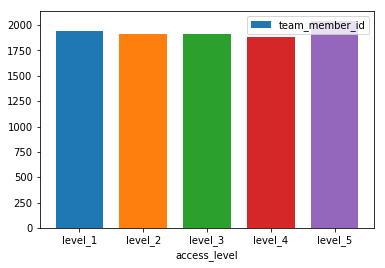

In [117]:
ax = df1.plot.bar(x='access_level', y='team_member_id', rot=0, align ='center',width = 0.75)

Plotting using matplotlib

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

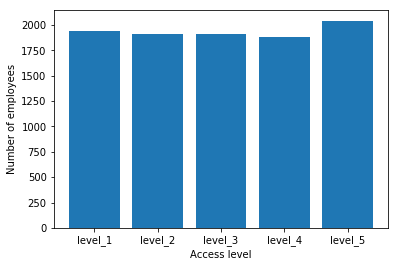

In [119]:
x=df1['access_level']
y=df1['team_member_id']
plt.bar(x,y,align='center', alpha=1)        
plt.xlabel('Access level')
plt.ylabel('Number of employees')
plt.show()


<b> 3. Create a new feature called "year_joined", in which shows the year that employee joined the
company. </b>

In [120]:
current =pd.datetime.now().year
df['year_joined']= current-df['years_employeed']

In [121]:
df

,team_member_id,department,years_employeed,employee_level,team_leader,access_level,year_joined
1,3084,IT,1,junior,0,level_5,2019
2,13110,Data Science,4,specialist,0,level_5,2016
4,26548,Customer Support,6,junior,0,level_5,2014
5,24508,IT,2,junior,0,level_3,2018
11,7773,Operation Research,5,junior,0,level_2,2015
12,27408,Human Resources,9,specialist,0,level_4,2011
13,28598,Customer Support,5,specialist,1,level_1,2015
15,627,Product Management,1,specialist,1,level_5,2019
21,6682,Data Science,0,specialist,0,level_3,2020
22,26407,Human Resources,2,senior,0,level_3,2018


## Part 2 Data Modelling

Modyfying datarame as required. Adding column explaining whether an employee has the access level 5 or not

In [122]:
df.loc[df['access_level'] == 'level_5', 'access_level_5'] =1
df.loc[df['access_level'] != 'level_5', 'access_level_5'] =0

In [123]:
df['access_level_5'] = df['access_level_5'].astype(int)

In [124]:
df

,team_member_id,department,years_employeed,employee_level,team_leader,access_level,year_joined,access_level_5
1,3084,IT,1,junior,0,level_5,2019,1
2,13110,Data Science,4,specialist,0,level_5,2016,1
4,26548,Customer Support,6,junior,0,level_5,2014,1
5,24508,IT,2,junior,0,level_3,2018,0
11,7773,Operation Research,5,junior,0,level_2,2015,0
12,27408,Human Resources,9,specialist,0,level_4,2011,0
13,28598,Customer Support,5,specialist,1,level_1,2015,0
15,627,Product Management,1,specialist,1,level_5,2019,1
21,6682,Data Science,0,specialist,0,level_3,2020,0
22,26407,Human Resources,2,senior,0,level_3,2018,0


In [97]:
 #df =df.sort_values(by=['access_level_5'], ascending=False)

<b> Converting Categorical variables to numerical with one hot encoding </b>

In [125]:
df_access = df

In [126]:
df_access=df_access.drop(['access_level'],axis =1)
df_access=df_access.drop(['year_joined'],axis =1)

In [127]:
df_access=df_access.drop(['team_member_id'],axis =1)

In [128]:
#df_access['department'] = pd.Categorical(df_access['department'])
#df_access['employee_level'] = pd.Categorical(df_access['employee_level'])

In [129]:
#df_dum = pd.get_dummies(df['department'], prefix = 'department')
#df_dum2 = pd.get_dummies(df['employee_level'], prefix = 'Level')
#df_dum3=pd.get_dummies(df_access.years_employeed,prefix = 'total_years_')

In [130]:
#df_access = pd.concat([df_access, df_dum], axis=1)
#df_access = pd.concat([df_access, df_dum2], axis=1)
#df_access = pd.concat([df_access, df_dum3], axis=1)

Dropping columns

In [325]:
#df_access=df_access.drop(['department'],axis =1)
#df_access=df_access.drop(['employee_level'],axis =1)
d#f_access=df_access.drop(['team_member_id'],axis =1)
#df_access=df_access.drop(['years_employeed'],axis =1)

In [383]:
df_access=df_access[['department_Customer Support','department_Data Science','department_Human Resources','department_IT','department_Operation Research','department_Product Management','total_years__0','total_years__1','total_years__2','total_years__3','total_years__4','total_years__5','total_years__6','total_years__7','total_years__8','total_years__9','Level_associate','Level_junior','Level_senior','Level_specialist','team_leader','access_level_5']]

In [131]:
df_access

,department,years_employeed,employee_level,team_leader,access_level_5
1,IT,1,junior,0,1
2,Data Science,4,specialist,0,1
4,Customer Support,6,junior,0,1
5,IT,2,junior,0,0
11,Operation Research,5,junior,0,0
12,Human Resources,9,specialist,0,0
13,Customer Support,5,specialist,1,0
15,Product Management,1,specialist,1,1
21,Data Science,0,specialist,0,0
22,Human Resources,2,senior,0,0


<b>Building Models </b>

In [132]:
#splitting into data and target
X = df_access.drop('access_level_5', axis=1)
y = df_access['access_level_5']

In [133]:
from sklearn.preprocessing import LabelEncoder
y_en = LabelEncoder()
X['department']= y_en.fit_transform(X['department'])

In [134]:
from sklearn.preprocessing import LabelEncoder
y_en = LabelEncoder()
X['employee_level']= y_en.fit_transform(X['employee_level'])

In [135]:
X

,department,years_employeed,employee_level,team_leader
1,3,1,1,0
2,1,4,3,0
4,0,6,1,0
5,3,2,1,0
11,4,5,1,0
12,2,9,3,0
13,0,5,3,1
15,5,1,3,1
21,1,0,3,0
22,2,2,2,0


In [136]:
#X= np.array(X)
#y=np.array(y)

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

<b>Machine Learning models</b>
As this problem is classification problem, which is to classify wherther person has the access level 5 or not , thus we have implemented two classification models.

<b>Logistic Regression</b>: As we have binary classes , thus we have implemented simple logistic regression classification model, where target is whether person has access level 5 or not.

In [161]:
logreg = LogisticRegression()
parameters= {'C':[1,10],'max_iter':[100]}

NameError: name 'LogisticRegression' is not defined

Implementing grid search for optimization .

In [162]:
grid_obj = GridSearchCV(logreg,parameters)
grid_obj = grid_obj.fit(X_train, y_train)


NameError: name 'GridSearchCV' is not defined

In [163]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

NameError: name 'grid_obj' is not defined

In [164]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7829214888958399


<b>SVM</b>: Support vector machine , is finding otpimal hyperplane by maximising margin.
Hyperplane then classifies the data.

In [165]:
from sklearn.model_selection import GridSearchCV
#Import svm model
from sklearn import svm

In [166]:
clf = svm.SVC() # Linear Kernel
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [167]:
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)


C:\Users\trkau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\trkau\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\trkau\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\trkau\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

In [168]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [170]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7857366280888333


In [69]:
X_train

,department,years_employeed,employee_level,team_leader
22907,0,4,1,1
29147,2,6,2,0
22279,0,8,0,0
5385,5,7,0,0
24750,0,3,3,0
9370,0,0,1,0
26086,3,6,1,0
18166,5,9,3,0
6243,4,0,1,0
16294,0,0,3,1


In [178]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [158]:
from sklearn.metrics import accuracy_score
predictions = clf1.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7829214888958399


In [179]:
clf1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=4, random_state=0)
clf2.fit(X_train, y_train)

C:\Users\trkau\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [154]:
from sklearn.metrics import accuracy_score
predictions = clf2.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7857366280888333


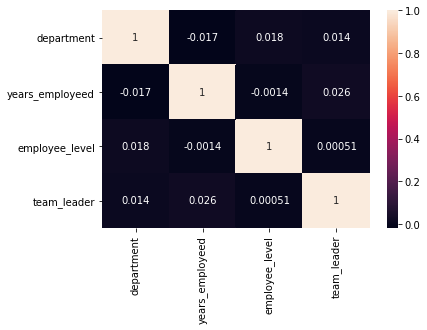

In [155]:
import matplotlib.pyplot as plt
import seaborn as sn

df = X_train.corr()
sn.heatmap(df, annot=True)